# DATA ANALYSIS PROCESS 

1. Problem Finding
2. Data Wrangling
      - 2.1 Data Gathering (csv, xlsx, db, api)
      - 2.2 Data Assessing 
      - 2.3 Data Preprocessing
3. EDA --> Exploratory Data Analysis --> Visualise Data, Statistical Methods
4. Reporting, Conclusions, Summary, Advisories
5. Dashboarding --> Power Bi and Tableau 

In [1]:
# importing major libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

# additional libraries 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
df = pd.read_csv('Magicbricks.csv')

### Data Assessing

# About MagicBricks 

**Magicbricks** is an Indian online real estate platform where users can buy, sell, or rent residential and commercial properties. It connects buyers, sellers, landlords, tenants, and brokers, offering property listings, price trends, locality insights, and services like home loans and legal assistance across major Indian cities.


In [3]:
# overview data 

df.head()

Area  BHK  Bathroom Furnishing    Location       District  \
0   950.0    2       2.0  Furnished  Karol Bagh  Central Delhi   
1   535.0    2       1.0  Furnished  Karol Bagh  Central Delhi   
2  1280.0    3       3.0  Furnished  Karol Bagh  Central Delhi   
3  1135.0    3       3.0  Furnished  Karol Bagh  Central Delhi   
4  1135.0    3       3.0  Furnished  Karol Bagh  Central Delhi   

                                            Locality  Parking         Status  \
0  DDA MIG Flats Prasad Nagar Phase 2, Prasad Nag...      1.0  Ready_to_move   
1                              Dev Nagar, Karol Bagh      1.0  Ready_to_move   
2                                         Karol Bagh      2.0  Ready_to_move   
3                          The Amaryllis, Karol Bagh      2.0   Almost_ready   
4                          The Amaryllis, Karol Bagh      2.0   Almost_ready   

    Transaction           Type  Per_Sqft     Price  
0        Resale      Apartment    8761.0  12500000  
1  New_Property      Apartment    7290.0   3900000  
2        Resale  Builder_Floor   14092.0  15000000  
3        Resale      Apartment   22222.0  25000000  
4        Resale      Apartment   22222.0  25000000

In [4]:
# shape 
df.shape

(1214, 13)

In [5]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Location', 'District',
       'Locality', 'Parking', 'Status', 'Transaction', 'Type', 'Per_Sqft',
       'Price'],
      dtype='object')


## 📊 **Data Card – MagicBricks Real Estate Dataset**

### **Dataset Overview**

* **Dataset Name:** MagicBricks Delhi Property Listings
* **Source:** MagicBricks (real estate listing platform)
* **Domain:** Real Estate / Property Analytics
* **Rows:** **1,214**
* **Columns:** **13**

This dataset captures residential property listings from different localities in Delhi, providing detailed information on property size, configuration, furnishing status, pricing, and transaction details.

---

### **📁 Feature Description**

| Column Name     | Description                                                |
| --------------- | ---------------------------------------------------------- |
| **Area**        | Carpet/Built-up area of the property in square feet        |
| **BHK**         | Number of bedrooms, hall, and kitchen                      |
| **Bathroom**    | Number of bathrooms in the property                        |
| **Furnishing**  | Furnishing status (Furnished, Semi-Furnished, Unfurnished) |
| **Location**    | Broad location or neighborhood                             |
| **District**    | Administrative district within Delhi                       |
| **Locality**    | Specific society, colony, or residential project           |
| **Parking**     | Number of parking spaces available                         |
| **Status**      | Construction status (Ready to Move, Almost Ready, etc.)    |
| **Transaction** | Type of transaction (New Property / Resale)                |
| **Type**        | Property type (Apartment, Builder Floor, etc.)             |
| **Per_Sqft**    | Price per square foot                                      |
| **Price**       | Total property price (INR)                                 |


## Types of Data Errors

### 1️⃣ **Completeness Errors**

* Occur when **data is missing**
* Examples:

  * Age, Salary, or City column has **NULL / blank values**
  * Missing target variable values
* Impact:

  * Models learn **incomplete patterns**
* Fix:

  * Drop rows, impute (mean/median/mode), or collect missing data

---

### 2️⃣ **Validity Errors**

* Data exists but is **logically or technically invalid**
* Examples:

  * Number of children stored as **float (2.5)**
  * Duplicate **patient_id**
  * Salary = **-10000**
  * Age = **-5**
* Impact:

  * Breaks business rules and model assumptions
* Fix:

  * Correct data types, apply constraints, remove duplicates

---

### 3️⃣ **Accuracy Errors**

* Data is valid in format but **factually incorrect**
* Examples:

  * Adult body weight = **13 kg**
  * Age = **190 years**
* Impact:

  * Leads to **wrong insights & predictions**
* Fix:

  * Apply domain knowledge, set realistic ranges

---

### 4️⃣ **Inconsistency Errors**

* Same information written in **different formats**
* Examples:

  * City: **New York City / NYC**
  * Name: **Gaurav / Gauri**
* Impact:

  * Creates duplicate categories and confuc but allowed values**
> **Inconsistency → Same thing, different names**


# Types of Data 

- **Dirty Data** -- > completeness, validity, accuracy, inconsistency 
- **Messy Data** -- > Structural Issues --> example : pivot tables, Sparsity issue 

In [6]:
# seeking information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1214 non-null   float64
 1   BHK          1214 non-null   int64  
 2   Bathroom     1212 non-null   float64
 3   Furnishing   1214 non-null   object 
 4   Location     1214 non-null   object 
 5   District     1214 non-null   object 
 6   Locality     1214 non-null   object 
 7   Parking      1182 non-null   float64
 8   Status       1214 non-null   object 
 9   Transaction  1214 non-null   object 
 10  Type         1209 non-null   object 
 11  Per_Sqft     973 non-null    float64
 12  Price        1214 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 123.4+ KB


* The dataset contains **null values**, indicating **completeness issues**.
* **Bathroom** and **Parking** columns are stored as **float**, though they represent counts — a **validity error**.
* The dataset includes **6 numerical columns** and **7 categorical (object-type) columns**, requiring proper preprocessing before analysis.


In [7]:
# seeking description 

df.describe()

Area          BHK     Bathroom      Parking       Per_Sqft  \
count   1214.000000  1214.000000  1212.000000  1182.000000     973.000000   
mean    1451.850751     2.778418     2.523927     1.708122   15574.885920   
std     1586.472855     0.946811     1.017723     5.717177   21574.389007   
min       28.000000     1.000000     1.000000     1.000000    1259.000000   
25%      800.000000     2.000000     2.000000     1.000000    6154.000000   
50%     1150.000000     3.000000     2.000000     1.000000   10838.000000   
75%     1620.000000     3.000000     3.000000     2.000000   17647.000000   
max    24300.000000    10.000000     7.000000   114.000000  183333.000000   

              Price  
count  1.214000e+03  
mean   2.079898e+07  
std    2.561308e+07  
min    1.000000e+06  
25%    5.600000e+06  
50%    1.400000e+07  
75%    2.500000e+07  
max    2.400000e+08

* **Accuracy issues identified in the dataset**:

  * The **Area** column shows extreme values, with a minimum of **28 sq ft** and a maximum of **24,300 sq ft**, which requires validation.
  * Properties with **10 BHK** need to be reviewed, as such configurations are rare and may be data entry errors.
  * A record showing **114 parking spaces** is highly unrealistic and indicates a possible accuracy issue.
  
* House prices range from **₹10 lakh to ₹24 crore**

In [8]:
# completnesss 
df.isnull().sum().sum()
# percentage
df.isnull().mean()*100

Area            0.000000
BHK             0.000000
Bathroom        0.164745
Furnishing      0.000000
Location        0.000000
District        0.000000
Locality        0.000000
Parking         2.635914
Status          0.000000
Transaction     0.000000
Type            0.411862
Per_Sqft       19.851730
Price           0.000000
dtype: float64

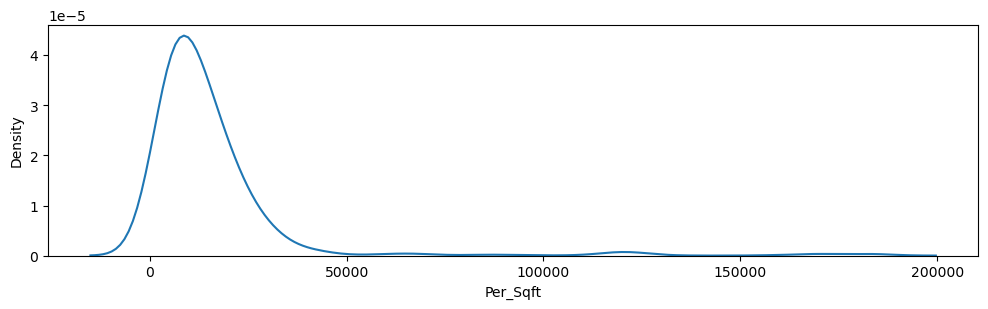

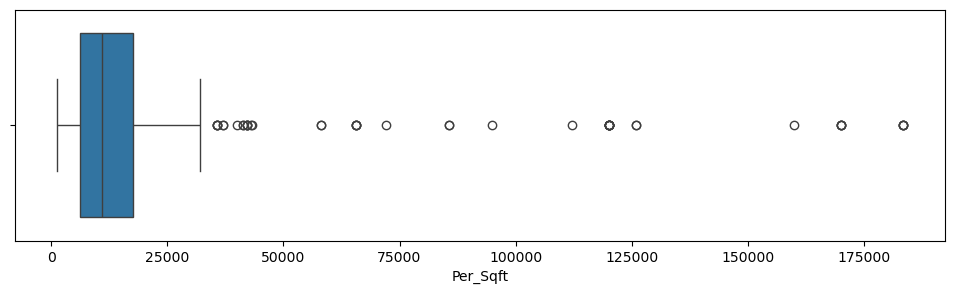

skewness 5.264871991245157


In [9]:
df.Per_Sqft.describe()
# visualisation 
plt.figure(figsize=(12,3))
sns.kdeplot(data=df, x='Per_Sqft')
plt.show()
plt.figure(figsize=(12,3))
sns.boxplot(data=df, x='Per_Sqft')
plt.show()

print('skewness',df.Per_Sqft.skew())

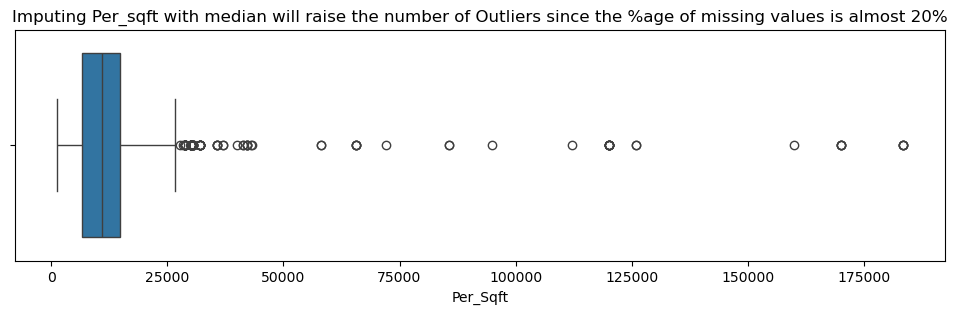

In [10]:
plt.figure(figsize=(12,3))
plt.title('Imputing Per_sqft with median will raise the number of Outliers since the %age of missing values is almost 20%')
sns.boxplot(x=df.Per_Sqft.fillna(df.Per_Sqft.median()))
plt.show()

In [11]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Location', 'District',
       'Locality', 'Parking', 'Status', 'Transaction', 'Type', 'Per_Sqft',
       'Price'],
      dtype='object')

In [12]:
# 'Area' --> 'Price'
# 'per_sqft' --> price/area

df.Per_Sqft = df.Per_Sqft.fillna(df.Price/df.Area)

In [13]:
df.Per_Sqft.isnull().sum()
# df.Per_Sqft is free from issue of completeness

0

In [14]:
df.isnull().sum()
# df.isnull().mean()*100

Area            0
BHK             0
Bathroom        2
Furnishing      0
Location        0
District        0
Locality        0
Parking        32
Status          0
Transaction     0
Type            5
Per_Sqft        0
Price           0
dtype: int64

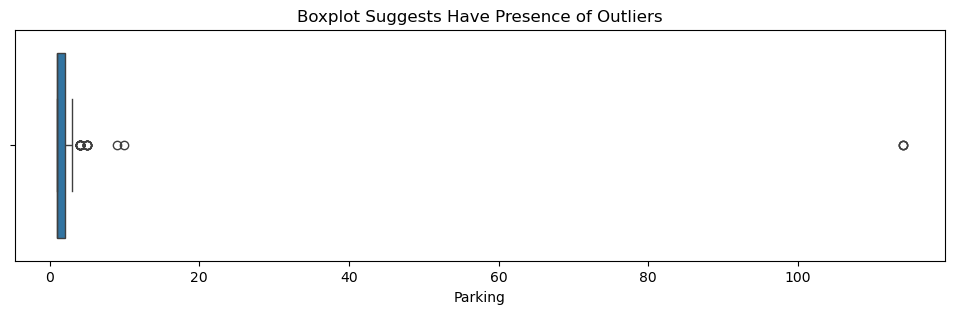

In [15]:
# outlier 
plt.figure(figsize=(12,3))
plt.title('Boxplot Suggests Have Presence of Outliers')
sns.boxplot(x=df.Parking)
plt.show()

In [16]:
df[df.Parking>100]

df.Parking = np.where(df.Parking>100,1,df.Parking)

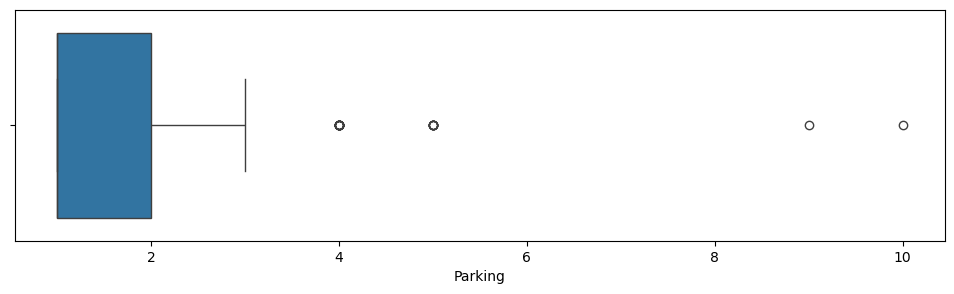

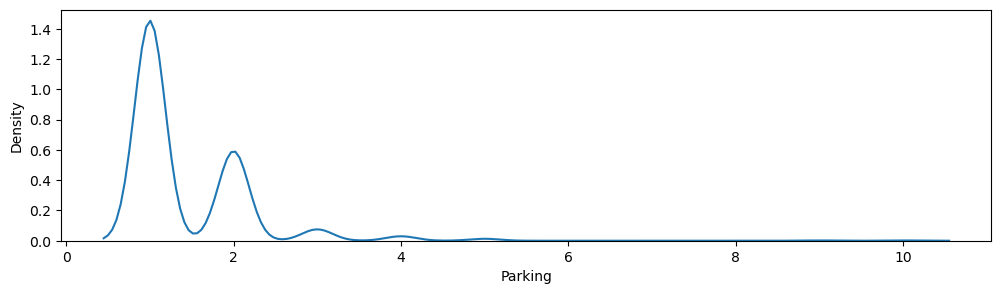

3.5598955904673226

In [17]:
plt.figure(figsize=(12,3))
sns.boxplot(x=df.Parking)
plt.show()
plt.figure(figsize=(12,3))
sns.kdeplot(x=df.Parking)
plt.show()
df.Parking.skew()

In [18]:
df.Parking = df.Parking.fillna(1)
df.Parking = df.Parking.astype(int)
df.Parking.sample(5)

958     1
49      1
177     1
1064    1
284     1
Name: Parking, dtype: int32

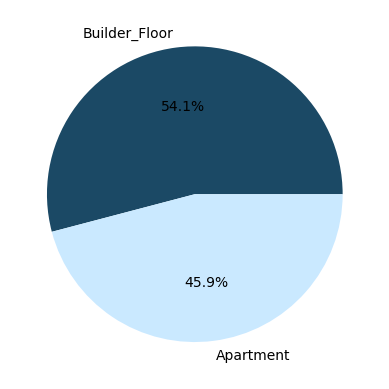

Type  count
0  Builder_Floor    654
1      Apartment    555

In [19]:
# Type 
df.isnull().sum()
colors = ["#1B4965", "#CAE9FF"]
temp = df.Type.value_counts().reset_index()
plt.pie(temp['count'],labels=temp.Type,autopct='%1.1f%%',colors=colors)
plt.show()
temp

In [20]:
df.Type.fillna('Builder_Floor',inplace=True)
df.Type.mode().values

array(['Builder_Floor'], dtype=object)

In [21]:
df.isnull().sum().sum()

2

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(1212, 13)

In [24]:
# numerical columns
# categorical columns
df.columns
num = list(df.describe().columns)
cat = []
for i in df.columns:
    if i not in num:
        cat.append(i)

print('numerical\t',num)
print('categorical\t',cat)

numerical	 ['Area', 'BHK', 'Bathroom', 'Parking', 'Per_Sqft', 'Price']
categorical	 ['Furnishing', 'Location', 'District', 'Locality', 'Status', 'Transaction', 'Type']


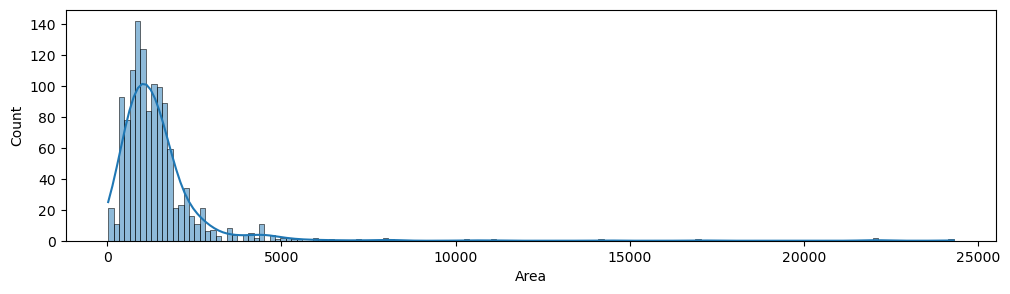

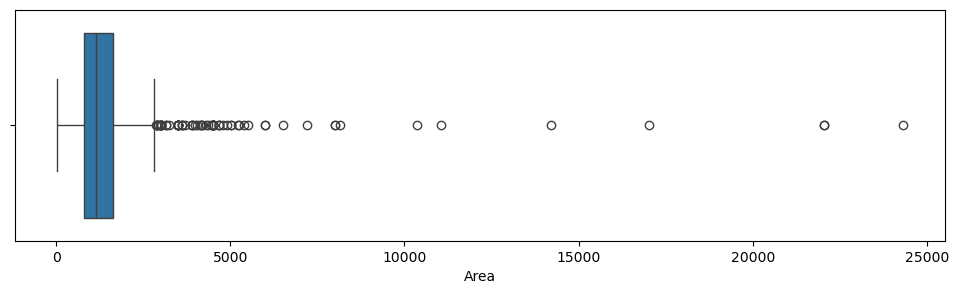

8.099780784747038

In [25]:
# univariate analysis 
# numerical columns 

# distribution 
plt.figure(figsize=(12,3))
sns.histplot(df.Area,kde=True)
plt.show()
plt.figure(figsize=(12,3))
sns.boxplot(x=df.Area)
plt.show()
df.Area.skew()

Presence of Outliers

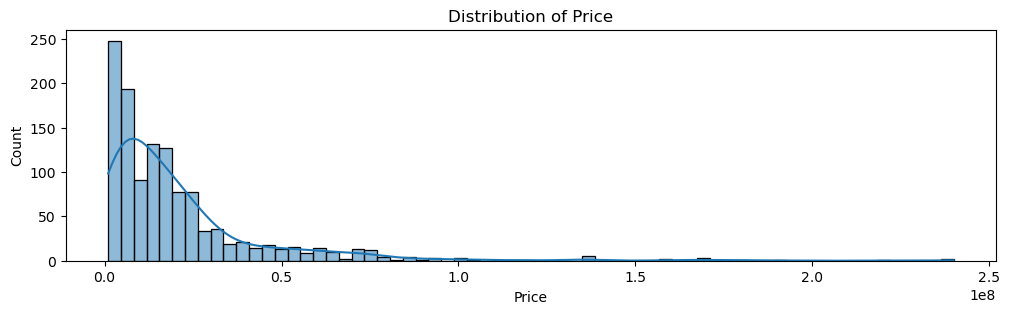

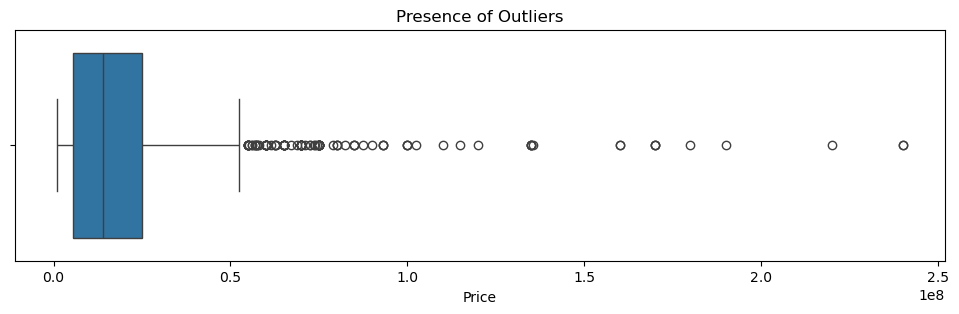

8.099780784747038

In [26]:
# Price 

plt.figure(figsize=(12,3))
plt.title('Distribution of Price')
sns.histplot(df.Price,kde=True)
plt.show()
plt.figure(figsize=(12,3))
plt.title('Presence of Outliers')
sns.boxplot(x=df.Price)
plt.show()
df.Area.skew()

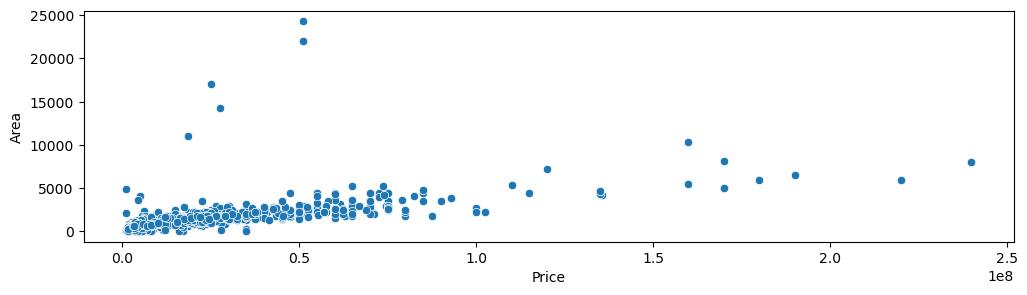

In [27]:
# bivariate analysis 
plt.figure(figsize=(12,3))
sns.scatterplot(data=df,x='Price',y='Area')
plt.show()

## Potential issue :

Area above 10k sqft is very affordable, which is not possible in Delhi like locations

In [28]:
df[df.Area>10000]

Area  BHK  Bathroom      Furnishing           Location     District  \
429  22050.0    4       4.0  Semi-Furnished    Greater Kailash  South Delhi   
431  22050.0    4       4.0  Semi-Furnished    Greater Kailash  South Delhi   
515  10350.0    4       7.0  Semi-Furnished     Friends Colony  South Delhi   
603  24300.0    4       5.0  Semi-Furnished              Saket  South Delhi   
806  14220.0    3       3.0  Semi-Furnished      Paschim Vihar   West Delhi   
835  17010.0    3       3.0  Semi-Furnished       Punjabi Bagh   West Delhi   
978  11050.0    3       3.0     Unfurnished  Chittaranjan Park  South Delhi   

                              Locality  Parking         Status   Transaction  \
429                  Greater Kailash 1        2   Almost_ready  New_Property   
431                  Greater Kailash 1        2   Almost_ready  New_Property   
515  Maharani Bagh, New Friends Colony        3  Ready_to_move  New_Property   
603                              Saket        2  Ready_to_move        Resale   
806             Paschim Vihar Block B4        1  Ready_to_move  New_Property   
835                  Punjabi Bagh West        2  Ready_to_move        Resale   
978                  Chittaranjan Park        1  Ready_to_move  New_Property   

              Type  Per_Sqft      Price  
429  Builder_Floor   30556.0   51000000  
431  Builder_Floor   30556.0   51000000  
515      Apartment   15459.0  160000000  
603  Builder_Floor   12500.0   51000000  
806  Builder_Floor   10943.0   27500000  
835  Builder_Floor   15278.0   25000000  
978  Builder_Floor   12916.0   18500000

In [29]:
22050.0*30556.0	

673759800.0

In [30]:
(673759800.0/51000000)/10

1.3210976470588236

In [31]:
df.Area = np.where(df.Area>10000,df.Area/10,df.Area)

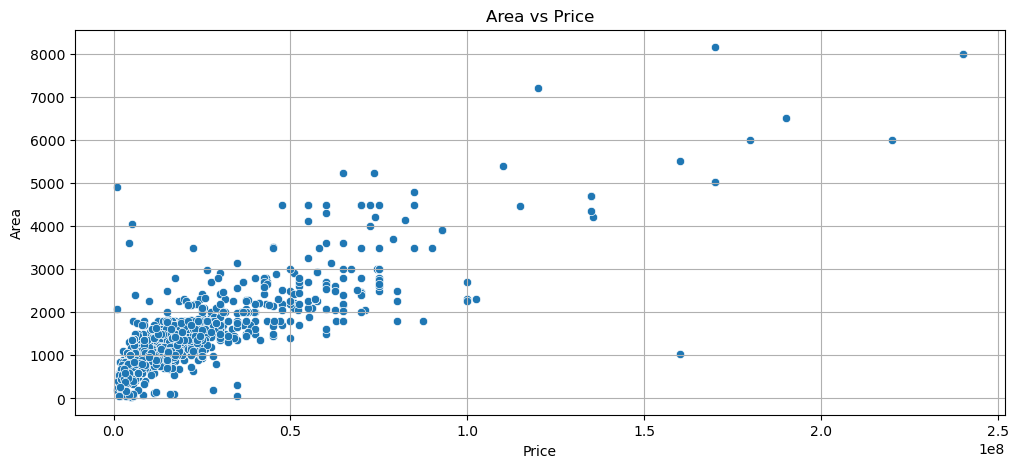

In [32]:
# bivariate analysis 
plt.figure(figsize=(12,5))
plt.title('Area vs Price')
sns.scatterplot(data=df,x='Price',y='Area')
plt.grid()
plt.show()

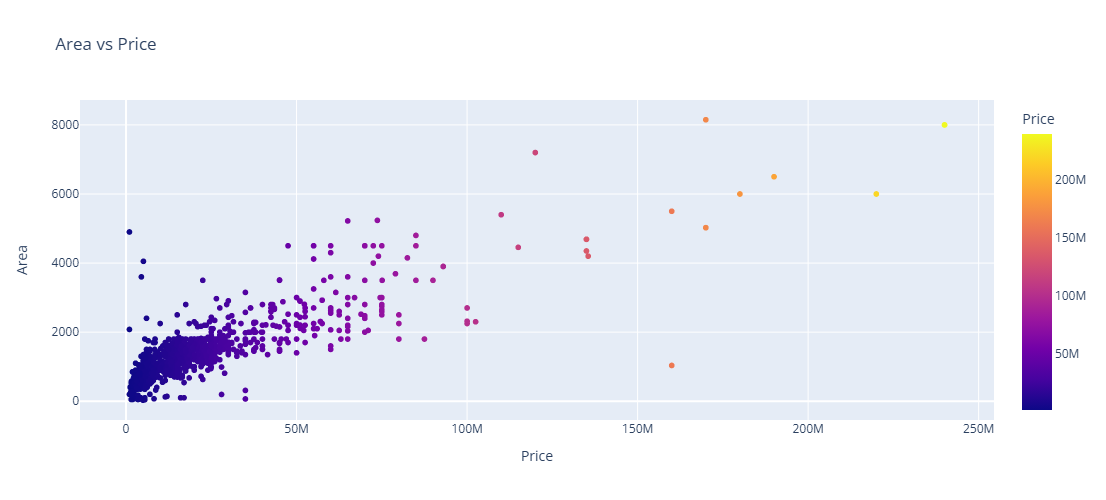

In [33]:
# plotly 

px.scatter(df,x='Price',y='Area',
           hover_data=['Area','Location','Price'],
           height=500,color='Price',title='Area vs Price')

# Exploratory Analysis 

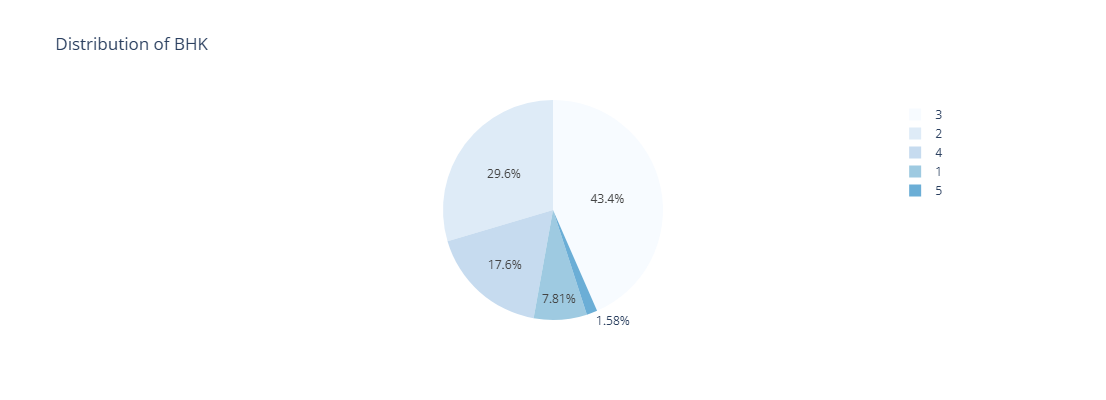

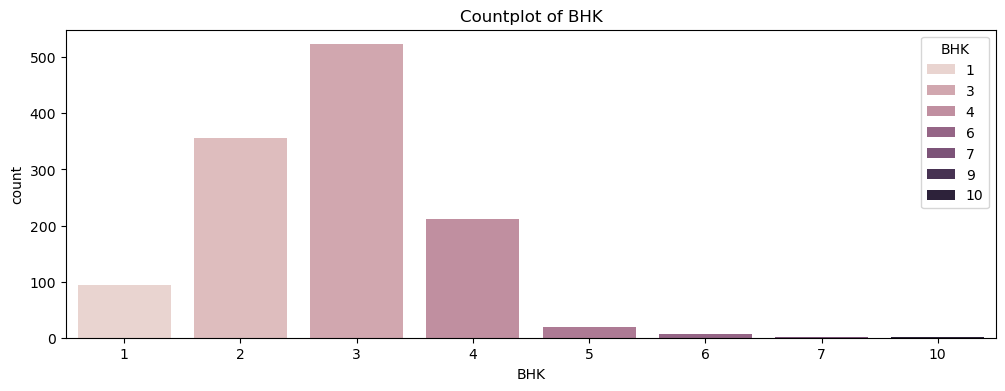

In [34]:
# univariate analysis 

num

# BHK 
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='BHK',hue='BHK')
plt.title('Countplot of BHK')
temp = df.BHK.value_counts().reset_index().head()
temp 
px.pie(temp,names='BHK',values='count',
       color_discrete_sequence=px.colors.sequential.Blues,
       height=400,title='Distribution of BHK')
# feature engg --> 5,6,7,10 --> 4+ BHK Entries 

* 3 BHK apartments have the highest number of listings on MagicBricks, indicating strong demand and builder preference
* 2 BHK units follow, driven by affordability and suitability for smaller or nuclear families
* 4 BHK and 1 BHK configurations show moderate to low availability, reflecting niche demand
* Very few listings exist for 5, 6, 7, and 10 BHK units, indicating low demand and a luxury-focused segment


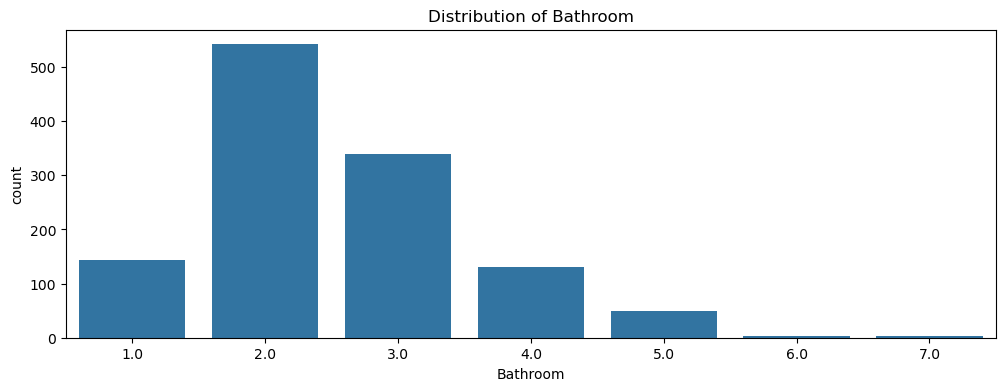

In [35]:
df.Bathroom.value_counts()
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='Bathroom')
plt.title('Distribution of Bathroom')
plt.show()

* Properties with **2 bathrooms have the highest number of listings**, followed by **3-bathroom configurations**
* **1 and 4 bathroom units show almost similar listing counts**, indicating moderate demand
* **5, 6, and 7 bathroom configurations are extremely rare**, reflecting limited availability
* Overall distribution suggests that **most listings are apartment-type properties rather than large independent houses**

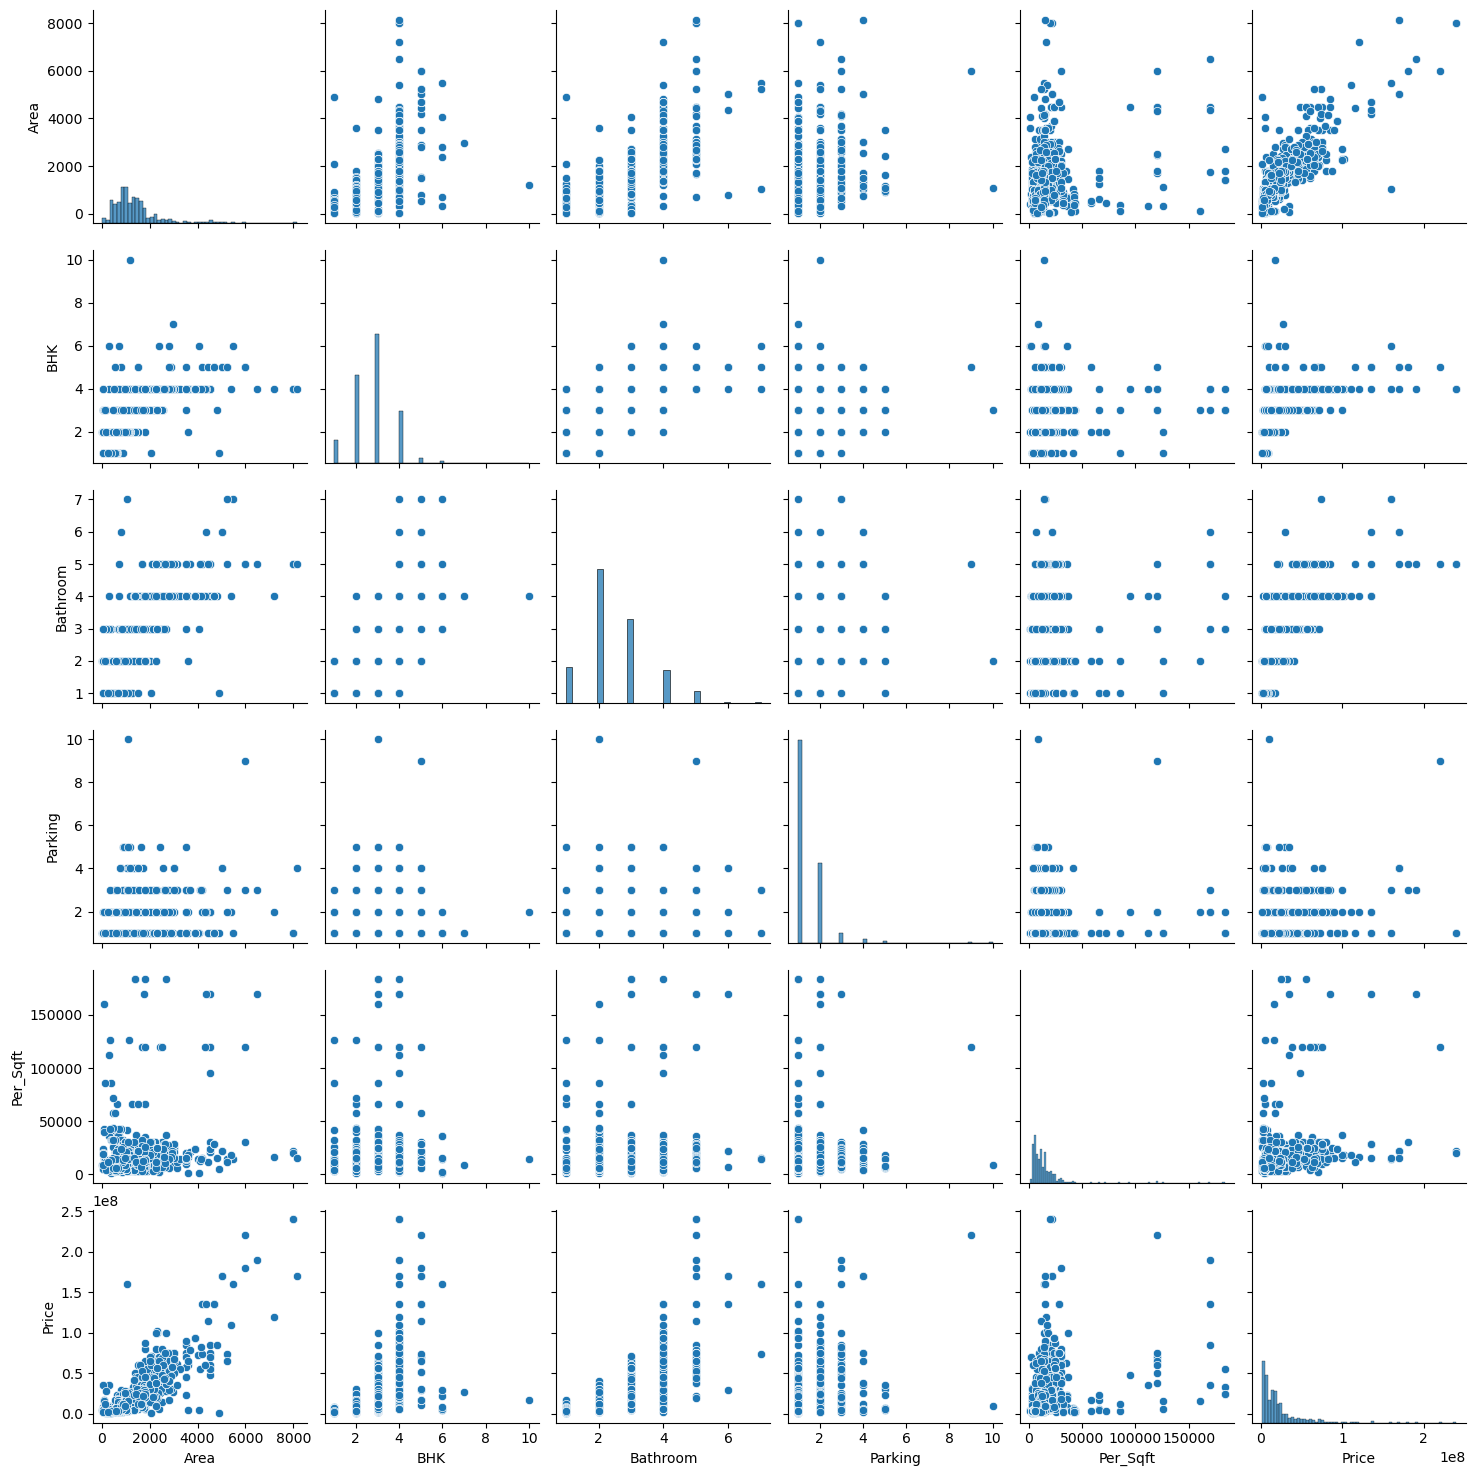

In [38]:
# multivariate analysis 

sns.pairplot(df)
plt.show()

<Axes: >

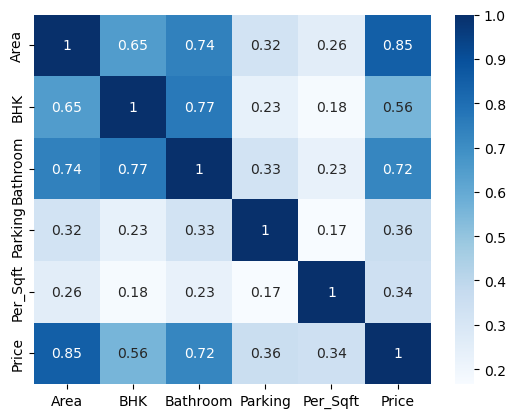

In [43]:
# corr
# heat map 
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True)

* **Price and Area** show a **very strong positive correlation (0.84)**, indicating that larger properties are priced significantly higher.
* **BHK and Bathroom** have strong correlations with **both Area and Price**, reflecting that bigger homes generally include more rooms and bathrooms, which increases property value.
* **Per Sqft Price and Parking** exhibit **weak or negligible correlations** with most other variables, suggesting limited influence on overall pricing and property size patterns.


In [44]:
# univariate analysis on categorical data 

In [45]:
cat

['Furnishing',
 'Location',
 'District',
 'Locality',
 'Status',
 'Transaction',
 'Type']

In [48]:
df.District.value_counts().reset_index()

District  count
0        South Delhi    457
1         West Delhi    150
2         East Delhi    135
3   North West Delhi    122
4   South West Delhi     95
5  South West Delhi      87
6           Shahdara     75
7   South East Delhi     59
8      Central Delhi     32

#### potential issue:
South West Delhi is showcasing 2 times

In [50]:
df.District.unique()

array(['Central Delhi', 'East Delhi', 'North West Delhi', 'Shahdara',
       'South Delhi', 'South East Delhi', 'South West Delhi',
       'South West Delhi ', 'West Delhi'], dtype=object)

In [52]:
df.District = df.District.str.strip()

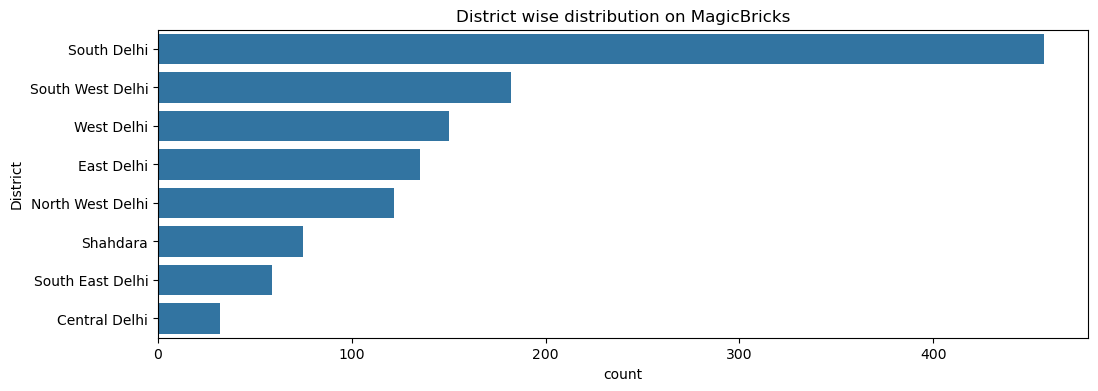

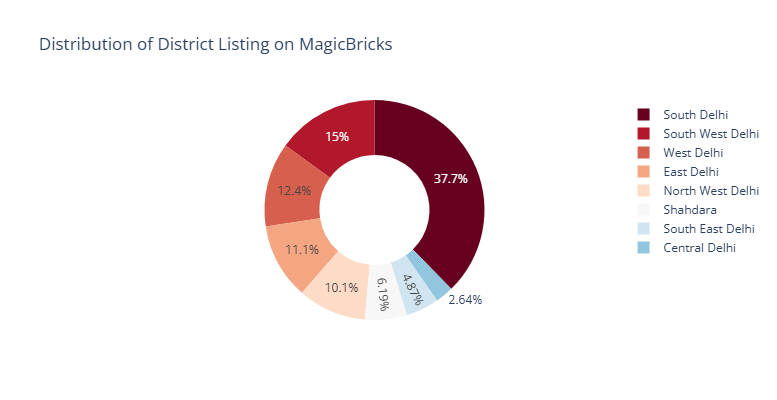

District  count
0       South Delhi    457
1  South West Delhi    182
2        West Delhi    150
3        East Delhi    135
4  North West Delhi    122
5          Shahdara     75
6  South East Delhi     59
7     Central Delhi     32

In [66]:
temp = df.District.value_counts().reset_index()
plt.figure(figsize=(12,4))
sns.countplot(data=df,y='District',order=temp.District)
plt.title('District wise distribution on MagicBricks')
plt.show()

px.pie(temp,values='count',names='District',height=400,
       color_discrete_sequence=px.colors.sequential.RdBu,hole=0.5,
      title='Distribution of District Listing on MagicBricks').show()
temp

* **South Delhi** records an **exceptionally high number of property listings**, clearly dominating the market in terms of supply.
* **South West, East, West, and North West Delhi** show **comparable listing volumes**, each ranging roughly between **100–125 listings**, indicating balanced availability across these regions.
* **Central Delhi** has the **lowest number of listings**, reflecting limited housing supply in this area.


In [69]:
# location 
# price 
# bivariate analysis 

df.loc[:,['Location','Price']].sample(5)

Location     Price
50           Rohini   7000000
215      Vasundhara  11000000
163   Paschim Vihar  30000000
569  Friends Colony  58000000
102        Mehrauli   1700000

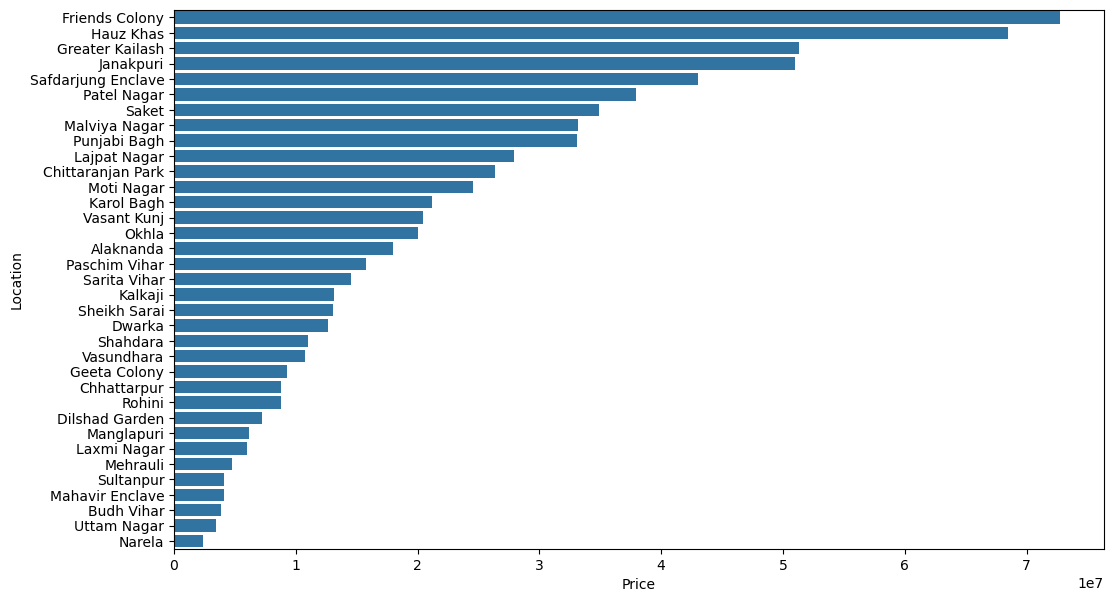

In [81]:
temp = df.groupby('Location')['Price'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,7))
sns.barplot(data=df,y='Location',x='Price',
            ci=False,order =temp.Location)
plt.show()

In [83]:
# information 

temp.Location.values

array(['Friends Colony', 'Hauz Khas', 'Greater Kailash', 'Janakpuri',
       'Safdarjung Enclave', 'Patel Nagar', 'Saket', 'Malviya Nagar',
       'Punjabi Bagh', 'Lajpat Nagar', 'Chittaranjan Park', 'Moti Nagar',
       'Karol Bagh', 'Vasant Kunj', 'Okhla', 'Alaknanda', 'Paschim Vihar',
       'Sarita Vihar', 'Kalkaji', 'Sheikh Sarai', 'Dwarka', 'Shahdara',
       'Vasundhara', 'Geeta Colony', 'Chhattarpur', 'Rohini',
       'Dilshad Garden', 'Manglapuri', 'Laxmi Nagar', 'Mehrauli',
       'Sultanpur', 'Mahavir Enclave', 'Budh Vihar', 'Uttam Nagar',
       'Narela'], dtype=object)

* **Premium South Delhi localities** such as *Friends Colony, Hauz Khas, Greater Kailash, Safdarjung Enclave,* and *Saket* dominate the top of the list, indicating significantly higher average property prices due to elite neighborhoods, superior infrastructure, and proximity to key hubs.
* **Well-developed West and Central Delhi areas** like *Janakpuri, Punjabi Bagh, Patel Nagar, Karol Bagh,* and *Vasant Kunj* fall in the mid-to-high price range, reflecting a balance between accessibility, amenities, and affordability.
* **Emerging and mixed-development regions** including *Dwarka, Rohini, Paschim Vihar, Sarita Vihar,* and *Chhattarpur* show moderate average prices, suggesting growing demand driven by improving connectivity and residential expansion.
* **Peripheral and outer-Delhi localities** such as *Uttam Nagar, Budh Vihar, Sultanpur,* and *Narela* rank lowest in average prices, highlighting affordability but relatively limited premium infrastructure and distance from central business areas.


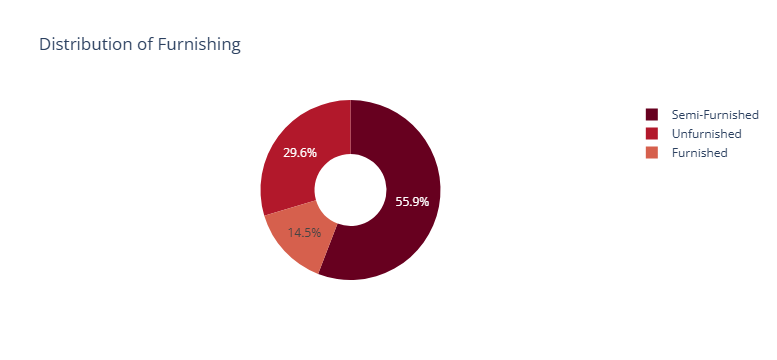

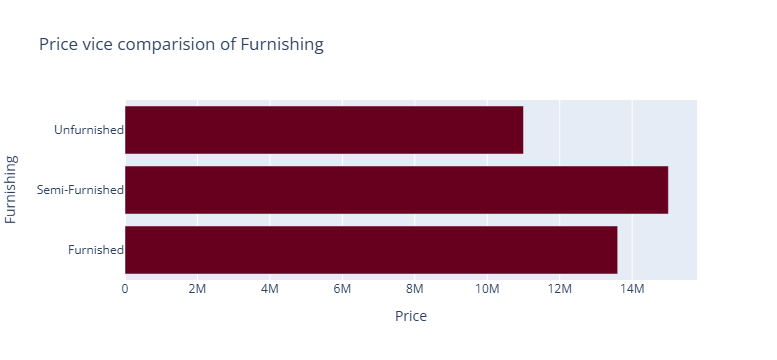

In [111]:
temp = df.Furnishing.value_counts().reset_index()

px.pie(temp,names='Furnishing'
       ,values='count',title='Distribution of Furnishing',hole=0.4,
       color_discrete_sequence=px.colors.sequential.RdBu).show()

temp2 = df.groupby('Furnishing')['Price'].median().reset_index()

px.bar(temp2,x='Price',y='Furnishing',title='Price vice comparision of Furnishing',
       color_discrete_sequence=px.colors.sequential.RdBu).show()

* **Semi-furnished properties dominate the listings on Magicbricks**, contributing **~55.9% of total supply**, indicating strong market preference and demand for semi-furnished homes.
* **Fully furnished properties have the lowest number of listings**, suggesting limited availability or higher owner retention in this segment.
* **Median price analysis shows semi-furnished homes priced the highest**, followed by **furnished properties**, while **unfurnished homes remain the most affordable overall**, reflecting a clear pricing gradient based on furnishing level.


In [112]:
cat

['Furnishing',
 'Location',
 'District',
 'Locality',
 'Status',
 'Transaction',
 'Type']

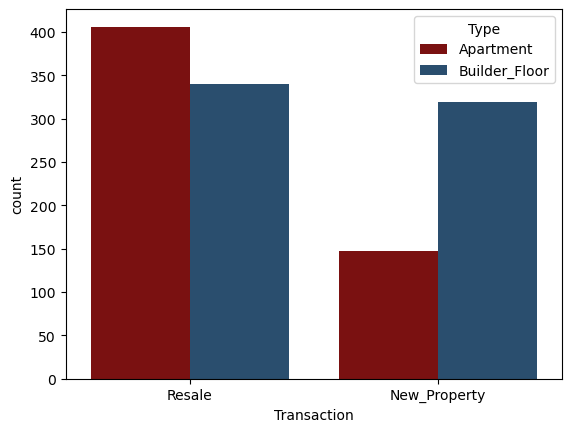

In [120]:
df.Transaction.value_counts()
rd_bu = ["#8B0000", "#1F4E79"]  # deep red, muted blue

sns.countplot(data=df,x='Transaction',hue='Type',palette=rd_bu)
plt.show()

* **Resale properties** show an **almost 1:1 distribution between apartments and builder floors**, indicating balanced availability across both property types.
* In contrast, **new property listings are heavily skewed toward builder floors**, with **significantly higher counts compared to apartments**, highlighting a clear developer preference for builder-floor constructions in the primary market.
